# 📉📊📈**Comparing the Performance of Various Machine Learning Models for SLT Stock Price Prediction**📉📊📈


# ✅ **Decision Tree Regression** ✅

Decision trees are versatile algorithms that can be used for both regression and classification tasks. They construct tree-like structures by recursively partitioning a dataset into smaller subsets based on feature values, while simultaneously building a decision tree. The process continues until the data is fully partitioned or a stopping criterion is met. The resulting tree consists of decision nodes that represent feature-based decisions and leaf nodes that hold the final predictions or classifications. Decision trees are effective in creating interpretable and easy-to-follow models for making decisions based on input features.

# **Import Libraries**

In [30]:
# Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

# Matplotlib and Seaborn for graphs and plottting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# **Load data into a Data Frame**

In [31]:
# Import the dataset
dataset = pd.read_csv(r"..\1. dataset\TeleCom_2009_2023_Daily.csv")

# View Columns
dataset.head(100)

,Date,Price,Open,High,Low,Vol.,Change %
0,7/8/2009,46.50,48.0,48.0,46.50,9.90K,-0.53%
1,7/9/2009,46.00,47.0,47.0,45.75,17.40K,-1.08%
2,7/13/2009,45.75,46.0,47.0,45.75,22.10K,-0.54%
3,7/14/2009,45.75,45.5,46.0,45.00,20.60K,0.00%
4,7/15/2009,45.50,45.5,46.0,45.25,23.60K,-0.55%
...,...,...,...,...,...,...,...
95,11/25/2009,40.00,40.5,41.0,39.50,19.80K,-1.23%
96,11/26/2009,39.75,40.0,40.0,39.75,15.00K,-0.63%
97,11/27/2009,40.00,40.0,40.0,39.50,16.60K,0.63%
98,11/30/2009,41.25,40.5,42.0,40.25,8.20K,3.13%


# **Data Preprocessing**

In [123]:
#Preprocess data
#Scale and normalize data
dataset['Increase_Decrease'] = np.where(dataset['Vol.'].shift(-1) > dataset['Vol.'],1,0)
dataset['Buy_Sell_on_Open'] = np.where(dataset['Open'].shift(-1) > dataset['Open'],1,0)
dataset['Buy_Sell'] = np.where(dataset['Price'].shift(-1) > dataset['Price'],1,0)
dataset['Open-Price']= dataset['Open'] - dataset['Price']
dataset['High-Low']  = dataset['High'] - dataset['Low']

dataset['Returns'] = dataset['Price'].pct_change()
dataset = dataset.dropna()
dataset.head()

,Date,Price,Open,High,Low,Vol.,Change %,Increase_Decrease,Buy_Sell_on_Open,Buy_Sell,Returns,Open-Close,High-Low,Open-Price
6,7/17/2009,45.50,45.00,46.00,45.00,71.70K,1.11%,0,1,1,0.011111,-0.50,1.00,-0.50
7,7/20/2009,46.50,46.00,47.00,46.00,68.80K,2.20%,1,1,1,0.021978,-0.50,1.00,-0.50
8,7/21/2009,47.50,47.25,48.50,47.00,88.50K,2.15%,0,1,1,0.021505,-0.25,1.50,-0.25
9,7/22/2009,47.69,47.50,48.50,47.25,42.70K,0.40%,0,1,0,0.004000,-0.19,1.25,-0.19
10,7/23/2009,47.25,47.75,47.75,47.00,20.70K,-0.92%,0,0,0,-0.009226,0.50,0.75,0.50


# **View Dataset**

In [124]:
#View Dataset
dataset

,Date,Price,Open,High,Low,Vol.,Change %,Increase_Decrease,Buy_Sell_on_Open,Buy_Sell,Returns,Open-Close,High-Low,Open-Price
6,7/17/2009,45.50,45.00,46.00,45.00,71.70K,1.11%,0,1,1,0.011111,-0.50,1.00,-0.50
7,7/20/2009,46.50,46.00,47.00,46.00,68.80K,2.20%,1,1,1,0.021978,-0.50,1.00,-0.50
8,7/21/2009,47.50,47.25,48.50,47.00,88.50K,2.15%,0,1,1,0.021505,-0.25,1.50,-0.25
9,7/22/2009,47.69,47.50,48.50,47.25,42.70K,0.40%,0,1,0,0.004000,-0.19,1.25,-0.19
10,7/23/2009,47.25,47.75,47.75,47.00,20.70K,-0.92%,0,0,0,-0.009226,0.50,0.75,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3233,4/3/2023,90.90,91.50,94.10,90.00,288.10K,-4.01%,1,0,1,-0.040127,0.60,4.10,0.60
3234,4/4/2023,91.50,90.60,92.80,89.60,303.49K,0.66%,1,1,1,0.006601,-0.90,3.20,-0.90
3235,4/6/2023,102.00,92.10,102.00,92.00,734.22K,11.48%,0,1,0,0.114754,-9.90,10.00,-9.90
3236,4/10/2023,98.00,100.00,102.75,97.30,152.39K,-3.92%,1,0,1,-0.039216,2.00,5.45,2.00


# **Null value testing**

In [125]:
# See how many null values in each column

dataset.isnull().sum()

Date                 0
Price                0
Open                 0
High                 0
Low                  0
Vol.                 0
Change %             0
Increase_Decrease    0
Buy_Sell_on_Open     0
Buy_Sell             0
Returns              0
Open-Close           0
High-Low             0
Open-Price           0
dtype: int64

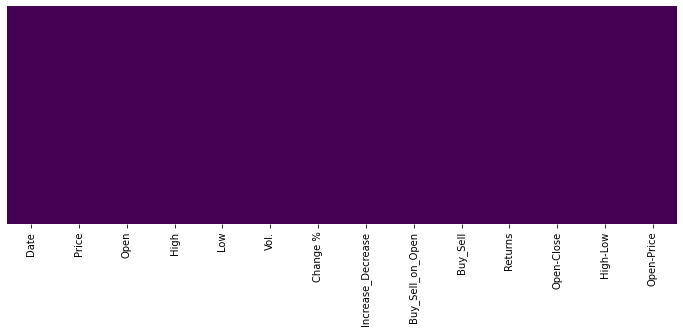

In [126]:
plt.figure(figsize=(12,4))
sns.heatmap(dataset.isnull(), yticklabels=False,cbar=False,cmap='viridis')
plt.savefig("Figure 1: Heatmap for Null Values")

# **Analyze the Data**

In [127]:
# see number of rows, number of columns
dataset.shape

(3214, 14)

In [128]:
#Total Number of Records
dataset.size
print("Total number of records = ",dataset.size)

Total number of records =  44996


In [129]:
# see columns names

dataset.columns

Index(['Date', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change %',
       'Increase_Decrease', 'Buy_Sell_on_Open', 'Buy_Sell', 'Returns',
       'Open-Close', 'High-Low', 'Open-Price'],
      dtype='object')

In [130]:
# See data types of the Columns
dataset.dtypes

Date                  object
Price                float64
Open                 float64
High                 float64
Low                  float64
Vol.                  object
Change %              object
Increase_Decrease      int32
Buy_Sell_on_Open       int32
Buy_Sell               int32
Returns              float64
Open-Close           float64
High-Low             float64
Open-Price           float64
dtype: object

array([[<AxesSubplot:title={'center':'Price'}>,
        <AxesSubplot:title={'center':'Open'}>,
        <AxesSubplot:title={'center':'High'}>],
       [<AxesSubplot:title={'center':'Low'}>,
        <AxesSubplot:title={'center':'Increase_Decrease'}>,
        <AxesSubplot:title={'center':'Buy_Sell_on_Open'}>],
       [<AxesSubplot:title={'center':'Buy_Sell'}>,
        <AxesSubplot:title={'center':'Returns'}>,
        <AxesSubplot:title={'center':'Open-Close'}>],
       [<AxesSubplot:title={'center':'High-Low'}>,
        <AxesSubplot:title={'center':'Open-Price'}>, <AxesSubplot:>]],
      dtype=object)

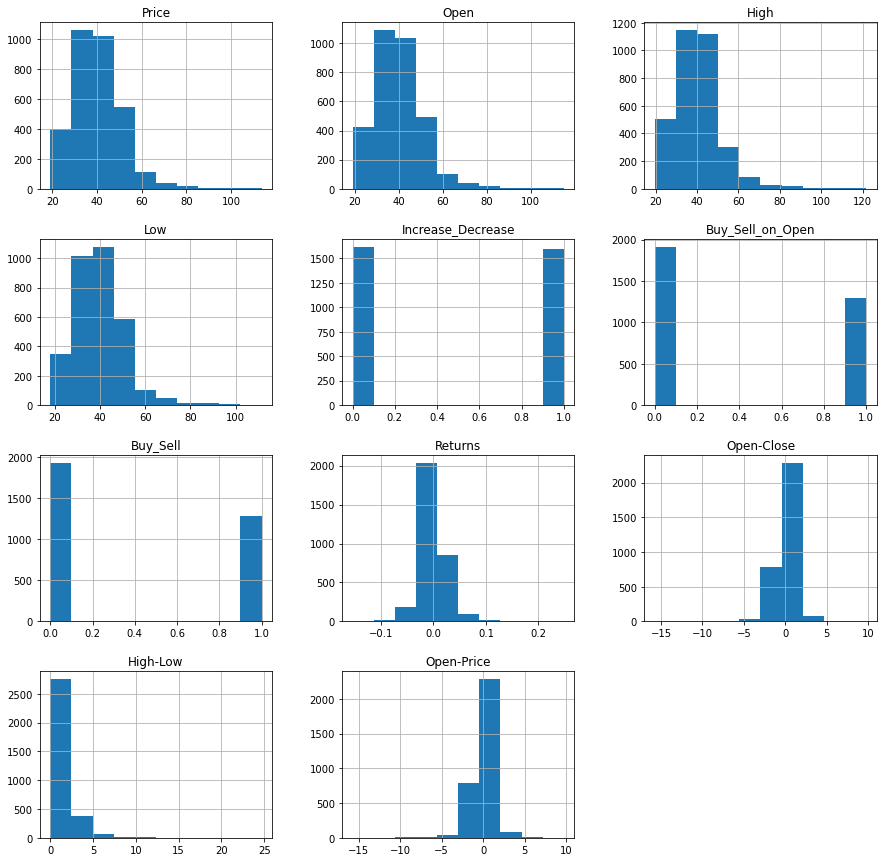

In [131]:
# Histogram per each numerical column

dataset.hist(figsize=(15, 15))

In [132]:
# The statistics per each column
dataset.describe()

,Price,Open,High,Low,Increase_Decrease,Buy_Sell_on_Open,Buy_Sell,Returns,Open-Close,High-Low,Open-Price
count,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000
mean,40.127688,40.115853,40.795877,39.355072,0.495644,0.404169,0.398880,0.000612,-0.011836,1.440806,-0.011836
std,11.368908,11.391515,11.787450,11.009603,0.500059,0.490807,0.489744,0.027156,1.261684,1.439083,1.261684
min,19.000000,19.000000,19.500000,18.000000,0.000000,0.000000,0.000000,-0.154489,-15.750000,0.000000,-15.750000
25%,32.500000,32.600000,32.925000,32.000000,0.000000,0.000000,0.000000,-0.012338,-0.500000,0.600000,-0.500000
50%,39.000000,39.000000,39.700000,38.225000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,47.000000,46.900000,47.500000,46.000000,1.000000,1.000000,1.000000,0.010863,0.500000,1.800000,0.500000
max,113.750000,115.000000,121.750000,111.500000,1.000000,1.000000,1.000000,0.248815,9.750000,24.700000,9.750000


# **Define X and Y**

In [179]:
#Define x
X = dataset.drop(['Date', 'Price', 'Vol.', 'Change %'], axis=1) 

#Define y
y = dataset['Price'] 

#Display x and y values
print(X)
print(y)

        Open    High    Low  Increase_Decrease  Buy_Sell_on_Open  Buy_Sell  \
6      45.00   46.00  45.00                  0                 1         1   
7      46.00   47.00  46.00                  1                 1         1   
8      47.25   48.50  47.00                  0                 1         1   
9      47.50   48.50  47.25                  0                 1         0   
10     47.75   47.75  47.00                  0                 0         0   
...      ...     ...    ...                ...               ...       ...   
3233   91.50   94.10  90.00                  1                 0         1   
3234   90.60   92.80  89.60                  1                 1         1   
3235   92.10  102.00  92.00                  0                 1         0   
3236  100.00  102.75  97.30                  1                 0         1   
3237   97.90  103.50  97.30                  0                 0         0   

       Returns  Open-Close  High-Low  Open-Price  
6     0.0111

# **Split Train data and Test data**

In [180]:
#Import train test split library
from sklearn.model_selection import train_test_split

#Split train set (80%) and test set (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# **Model Traning**

In [181]:
#Training the model with decision tree regression
from sklearn.tree import DecisionTreeRegressor  
regressor = DecisionTreeRegressor()  
regressor.fit(X_train, y_train)

DecisionTreeRegressor()

# **Comparison of Actual Values and Predictions Values**

In [182]:

y_pred = regressor.predict(X_test)

In [183]:
#Actal values vs predicted values table
df = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})  
print(df.head())
print(df.tail())

      Actual  Predicted
2592    28.5       28.5
2224    21.9       22.0
313     46.0       46.3
843     44.9       44.5
2805    33.5       33.8
      Actual  Predicted
2653    31.0       30.5
1523    47.9       47.0
2446    30.5       30.8
3186    68.0       68.6
1571    39.8       39.9


In [184]:
print(y_test.shape)
print(y_pred.shape)

(643,)
(643,)


# **Accuracy and Loss Function Values**

In [185]:
##Calculating error metrics to analyse model performance
from sklearn import metrics  
print('Mean_Absolute_Error(MAE):', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean_Squared_Error(MSE):', metrics.mean_squared_error(y_test, y_pred))  
print('Root_Mean_Squared_Error(RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean_Absolute_Error(MAE): 0.35979782270606525
Mean_Squared_Error(MSE): 0.4319867807153965
Root_Mean_Squared_Error(RMSE): 0.6572570126787515


In [186]:
from sklearn.model_selection import cross_val_score

#Cross validate train data with predicted data
dt_fit = regressor.fit(X_train, y_train)
dt_scores = cross_val_score(dt_fit, X_train, y_train, cv = 5)

In [187]:
#Display accuracy score
print("Accuracy score: {:.7f}".format(regressor.score(X_test, y_test)))

Accuracy score: 0.9963747
